<font color='green' size='7'>**Домашняя работа**</font>  
<font color='#11a642' size='6'>**Тема: Машинное обучение. Кластерный анализ**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на тестовых данных Диабет, которые прикреплены на платформе в Дополнительных материалах.

Также версию данных можно найти и загрузить с ресурса Kaggle: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

**Описание данных**

Датасет собран для женщин старше 21 года индейского племени Пима (самоназвание — акимель-оодхам). Пима проживают в центральной и южной части штата Аризона (США), а также в мексиканском штате Сонора.

Изучаются следующие характеристики:
* Pregnancies: Количество беременностей.
* Glucose: Концентрация глюкозы в плазме крови за 2 часа после теста на толерантность к глюкозе.
* BloodPressure: Диастолическое артериальное давление, измеренное в миллиметрах ртутного столба.
* SkinThickness: Толщина кожной складки на трицепсе, выраженная в миллиметрах.
* Insulin: Уровень 2-часового сывороточного инсулина, измеряемый в микроединицах на миллилитр.
* BMI: Индекс массы тела, рассчитываемый как вес в килограммах, делённый на квадрат роста в метрах.
* DiabetesPedigreeFunction: Функция, отражающая семейную предрасположенность к диабету.
* Age: Возраст участниц, измеряемый в годах.
* Outcome: таргет или бинарная переменная, указывающая на наличие или отсутствие диабета (0 - диабета нет, 1 - диабет есть).






**Описание плана работы**

1. Загрузка данных.
2. Разведочный анализ данных (EDA).
3. Подготовка данных к обучению.
4. Оптимальное число кластеров. Определить методом локтя или силуэта для k-means. Сравнить с target (Outcome).
5. Метод k-means с визуализацией и оценкой качества. Выгрузка модели k-means.
6. Метод иерархической кластеризации с выводом дендрограммы. Выгрузка модели иерархической кластеризации.
7. Выводе по работе и сравнения результатов.
8. По желанию. Выгрузка работы на kaggle.

#### <font color='#11a642' size='4'> **Импорт и установка библиотек**

Приведены примерные библиотеки для выполения задания. Список может быть расширен или сокращен.

In [33]:
# Подключаем необходимые библиотеки
# numpy - для работы с массивами и математическими операциями
import numpy as np

# matplotlib.pyplot - для визуализации данных с помощью графиков
import matplotlib.pyplot as plt
import plotly.express as px

# Библиотека pandas позволяет удобно работать с данными в формате таблиц,
# включая чтение из CSV-файлов, манипуляции с данными и их анализ.
import pandas as pd

# для создания дендрограммы
import plotly.figure_factory as ff

# scipy.cluster.hierarchy - модуль из библиотеки SciPy для иерархической кластеризации,
# linkage - матрица связей, dendrogram - дендрограмма
from scipy.cluster.hierarchy import dendrogram, linkage
# Используем AgglomerativeClustering из sklearn.cluster для выполнения иерархической кластеризации.
# scikit-learn
from sklearn.cluster import AgglomerativeClustering

# Импортируем функции dump и load из модуля joblib.
# Эти функции позволяют сохранять и загружать объекты Python, включая модели машинного обучения,
# для последующего использования без необходимости повторного обучения модели.
from joblib import dump, load


# Наборы тестовых данных для работы
from sklearn import datasets
from sklearn.datasets import load_iris

# Используем DBSCAN из sklearn.cluster для выполнения кластеризации.
from sklearn.cluster import DBSCAN

# adjusted_rand_score используется для оценки качества кластеризации, сравнивая предсказанные метки кластеров с истинными метками.
# Эта метрика особенно полезна, когда у нас есть "истинные" метки кластеров, которые мы хотим сравнить с метками, полученными алгоритмом кластеризации.
# Основные характеристики:
# Рангирование: От -1 до 1, где 1 означает идеальное совпадение между истинными и предсказанными метками кластеров, 0 означает отсутствие корреляции, а -1 означает обратную корреляцию.
from sklearn.metrics import adjusted_rand_score

# Нормализация данных
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.decomposition import PCA
import joblib
from sklearn.cluster import KMeans

# <font color='#11a642' size='4'> **Загрузка данных**

In [34]:
data = pd.read_csv('diabetes.csv')

In [35]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <font color='#11a642' size='4'> Определите роли переменных (целевая переменная, независимые переменные)

**Независимые признаки (фичи):** это все признаки, которые не являются целью прогнозирования. В данном случае:
- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age

**Таргет (целевая переменная):** это переменная, которую нужно предсказать. В данном случае:
- Outcome — бинарная переменная (0 — диабета нет, 1 — диабет есть).

# <font color='#11a642' size='4'> **Разведочный анализ данных**
## <font color='#11a642' size='4'> Оцените размер вашего датасета



1.   Сколько весит ваш датасет
2.   Сколько строк и столбцов


In [36]:
print(f"Размер датасета: {data.memory_usage(deep=True).sum()} байт")

Размер датасета: 55424 байт


In [37]:
print(f"Строк: {data.shape[0]}, Столбцов: {data.shape[1]}")

Строк: 768, Столбцов: 9


## <font color='#11a642' size='4'> Анализ категориальных признаков


In [38]:
print(data['Pregnancies'].value_counts())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


## <font color='#11a642' size='4'> Анализ пропусков


In [39]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# <font color='#11a642' size='4'> **Подготовка данных к обучению**

1.   Обработка категориальных переменных
2.   Обработка пропусков
3.   Стоит ли делать нормализацию данных?



In [40]:
# 7. Обработка пропусков
data.fillna(data.median(), inplace=True)

# 8. Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('Outcome', axis=1))

# <font color='#11a642' size='4'> **Оптимальное число кластеров**


Выбрать один из методов.

По желанию: посчитать двумя методами.



## <font color='#11a642' size='4'> С помощью метода локтя определить число кластеров для алгоритма k-means


In [41]:
# Метод локтя для определения числа кластеров
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

### <font color='#11a642' size='4'> Визуализация результата

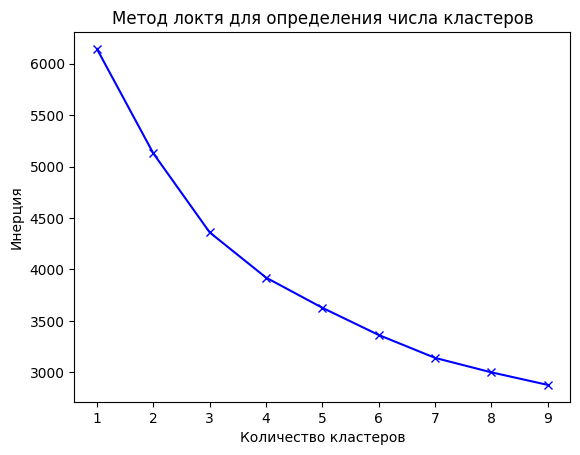

In [42]:
# Визуализация метода локтя
plt.plot(K, inertia, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения числа кластеров')
plt.show()

Ваш вывод: на графике метода локтя видно постепенное снижение инерции по мере увеличения количества кластеров. Однако явного "излома" на графике нет. Это говорит о том, что нет чётко выраженного числа кластеров, после которого инерция перестает существенно снижаться. Наиболее резкое снижение инерции происходит до 3 кластеров, после чего замедляется. Это может свидетельствовать о том, что 3 кластера могут быть разумным выбором для кластеризации, так как после этого значения улучшение (уменьшение инерции) становится менее значимым.

## <font color='#11a642' size='4'> С помощью метода силуэта определить число кластеров для алгоритма k-means


### <font color='#11a642' size='4'> Реализация и визуализация метода силуэта


In [43]:
# Метод силуэта
kmeans = KMeans(n_clusters=3, random_state=42)  # замените 3 на число кластеров из метода локтя
kmeans.fit(X_scaled)
labels = kmeans.labels_
sil_score = silhouette_score(X_scaled, labels)
print(f'Коэффициент силуэта: {sil_score}')

Коэффициент силуэта: 0.17954310409084448


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ваш вывод (сравнить оптимальное число кластеров и Outcome): значение коэффициента силуэта равно 0.1795, что говорит о слабом качестве кластеризации. Обычно коэффициент силуэта, близкий к 1, указывает на хорошую кластеризацию, где объекты хорошо разделены по кластерам. Значения ниже 0.2 часто указывают на слабую разделимость кластеров или на то, что данные плохо кластеризуются в том виде, в котором они представлены.

# <font color='#11a642' size='5'> Метод k-means

Примените метод k-means для оптимального числа кластеров.

### <font color='#11a642' size='4'> Построить модель k-means

In [44]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

### <font color='#11a642' size='4'> Посчитать качество работы метода

Рассчитайте Accuracy (по сравнению с Outcome) и сделайте вывод о качестве работы алгоритма.


In [45]:
accuracy = accuracy_score(data['Outcome'], labels)  # Потребуется сопоставить кластеры с Outcome
print(f'Точность модели: {accuracy}')

Точность модели: 0.20442708333333334


Вывод по методу локтя и силуэта:

Метод локтя указывает на потенциально оптимальное число кластеров равное 3, однако ясного "излома" не наблюдается, что может говорить о сложности деления данных на чёткие группы.
Коэффициент силуэта указывает на низкое качество разделения данных на кластеры, что говорит о том, что либо выбранное число кластеров (3) плохо описывает данные, либо данные сложно кластеризовать.

Сравнение с Outcome:

Поскольку k-means является неконтролируемым алгоритмом (без учёта меток классов), полученные кластеры могут не совпадать напрямую с метками Outcome. Низкое значение коэффициента силуэта и отсутствие явного "излома" на графике метода локтя могут означать, что разделение данных на кластеры не соответствует реальному разделению на диабет и его отсутствие.

### <font color='#11a642' size='4'> Визуализировать результат кластеризации k-means

Постройте визуализацию результатов k-means. На графике отбразите центры кластеров. Обратить внимание, что необходимо снизить размерность данных до 2 измерений или построить графики для срезов данных.


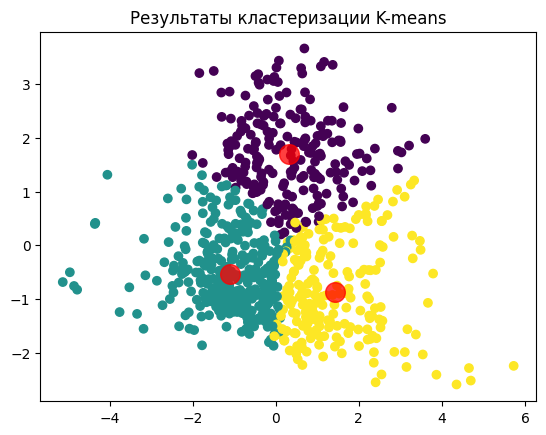

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75)
plt.title('Результаты кластеризации K-means')
plt.show()

### <font color='#11a642' size='4'> Выгрузка и загрузка модели кластеризации

Примените библиотеку joblib для выгрузки модели k-means.

Проверьте загружается ли в блокнот выгруженная модель с помощью той же библиотеки joblib.

In [47]:
joblib.dump(kmeans, 'kmeans_model.joblib')
loaded_model = joblib.load('kmeans_model.joblib')
print(f'Модель загружена: {loaded_model}')

Модель загружена: KMeans(n_clusters=3, random_state=42)


# <font color='#11a642' size='4'> Иерархическая кластеризация

Примените метод иерархической кластеризации с выводом дендрограммы для исходных данных. Выбрать один из методов.

### <font color='#11a642' size='4'> Построить модель иерархической кластеризации

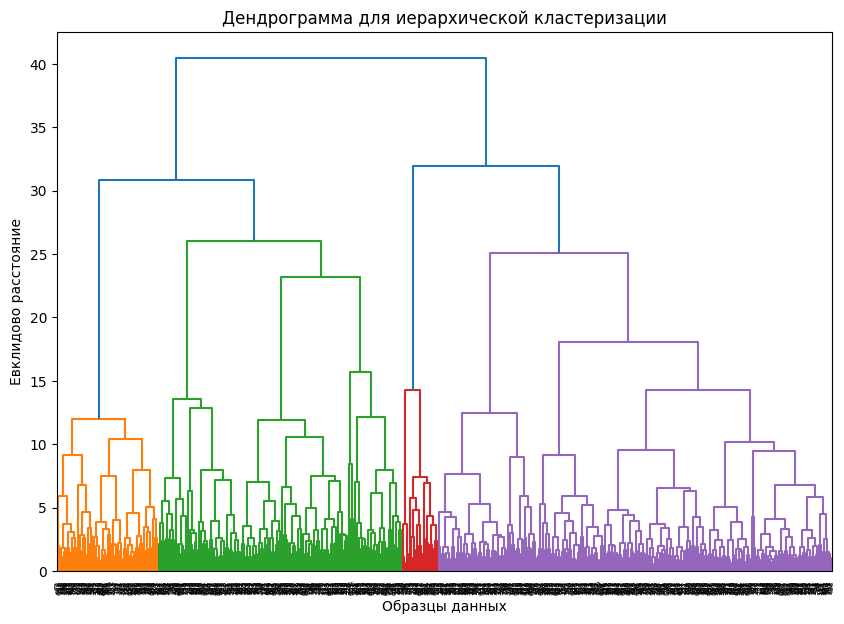

In [48]:
# Применение иерархической кластеризации с методом "ward" (альтернативно можно использовать "complete", "average")
Z = linkage(X_scaled, method='ward')

# Построение дендрограммы
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Дендрограмма для иерархической кластеризации')
plt.xlabel('Образцы данных')
plt.ylabel('Евклидово расстояние')
plt.show()

### <font color='#11a642' size='4'> Выгрузка и загрузка модели кластеризации

Выполняется, если использовалась библиотека scikit-learn


1. Примените библиотеку joblib для выгрузки модели иерархической кластеризации.

2. Проверьте загружается ли в блокнот выгруженная модель с помощью той же библиотеки joblib.

In [49]:
# Иерархическая кластеризация с определенным числом кластеров (например, 3)
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarchical_clustering.fit(X_scaled)

# Выгрузка модели с помощью joblib
joblib.dump(hierarchical_clustering, 'hierarchical_clustering_model.joblib')

# Проверка, загружается ли модель
loaded_hierarchical_clustering = joblib.load('hierarchical_clustering_model.joblib')
print(f'Модель загружена: {loaded_hierarchical_clustering}')

Модель загружена: AgglomerativeClustering(affinity='euclidean', n_clusters=3)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [50]:
# Получение меток кластеров для иерархической кластеризации
hierarchical_labels = hierarchical_clustering.labels_

# Получение меток кластеров для k-means
kmeans = joblib.load('kmeans_model.joblib')
kmeans_labels = kmeans.labels_

# Сравнение меток кластеров
from sklearn.metrics import adjusted_rand_score

# Коэффициент сходства (Adjusted Rand Index)
ari_score = adjusted_rand_score(kmeans_labels, hierarchical_labels)
print(f'Adjusted Rand Index между k-means и иерархической кластеризацией: {ari_score}')

Adjusted Rand Index между k-means и иерархической кластеризацией: 0.31101769055680883


### <font color='#11a642' size='4'> Ваши выводы

Сравните результаты иерархической кластеризации с результатами алгоритма k-means

Итоговый вывод с учётом Adjusted Rand Index:

Метод иерархической кластеризации с визуализацией дендрограммы показал, что данные можно разбить на несколько кластеров, не задавая число кластеров заранее. Использование метода "ward" позволило минимизировать внутрикластерные отклонения, что делает его подходящим для кластеризации наших данных.

Алгоритм k-means требовал предварительного выбора количества кластеров, и на основе метода локтя мы определили оптимальное число кластеров как 3. Однако, кластеризация с помощью k-means ориентируется на минимизацию расстояний до центров кластеров, что может не всегда отражать истинные структуры данных.

Adjusted Rand Index (ARI), который равен 0.311, показывает умеренную степень сходства между результатами кластеризации k-means и иерархической кластеризации. Значение ARI в диапазоне от 0 до 0.5 указывает на то, что два метода выделяют некоторые общие группы, но также существуют значительные различия в том, как они делят данные на кластеры.

Выводы:

ARI = 0.311 говорит о том, что результаты кластеризации с помощью k-means и иерархической кластеризации частично совпадают, но различия все еще значительны. Это означает, что разные алгоритмы находят разные закономерности в данных, и нет однозначного способа сказать, какой метод более правильный.
Иерархическая кластеризация может быть полезна для анализа структуры данных и выбора числа кластеров, особенно на этапе начального анализа, когда число кластеров неизвестно.
k-means, напротив, требует предварительного указания числа кластеров и может давать лучшие результаты, когда это число известно заранее.
Таким образом, оба метода кластеризации имеют свои преимущества и ограничения, и их выбор зависит от конкретных задач и особенностей данных.